<a href="https://colab.research.google.com/github/cperalta22/rplots/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

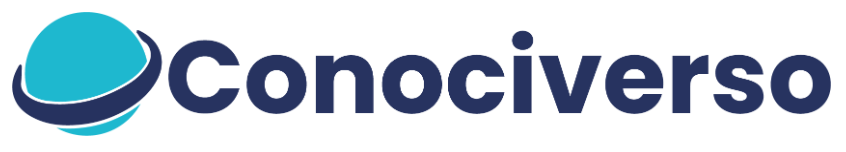


Carlos Alberto Peralta Alvarez 2025 | GPL3

# Visualización de datos en R

Algunos recursos muy útiles para graficar en R los puedes encontrar en [R graph gallery](https://r-graph-gallery.com) y también en [R CHARTS](https://r-charts.com/es/)

## ☝ Graficos con el paquete _base_ de R

Son funciones que vienen preestablecidas en el lenguaje de programación y no se requiere nada mas para hacerlas funcionar.

### 📚 Preparación de los datos

### Instrucciones

*   Descarga e importa estos archivos a Colab
  * [luciferasas.csv](https://github.com/cperalta22/rplots/blob/main/luciferasas.csv)
  * [genes.csv](https://github.com/cperalta22/rplots/blob/main/genes.csv)
  * [expdiff.csv](https://github.com/cperalta22/rplots/blob/main/expdiff.tsv)


## ⏰ **Ejercicio**

*   Importa el paquete tidyverse al entorno de trabajo con `library(tidyverse)`
*   Usa la funciones `read_tsv()` y `read_csv()` para cargar como tibbles los datos que acabas de subir
*   Explora su contenido con `head()` y `glimpse()`

In [ ]:
library(tidyverse)

In [ ]:
expdiff <- read_tsv("expdiff.tsv")
genes <- read_csv("genes.csv", col_names = F)
luciferasas <- read_csv("luciferasas.csv")

colnames(genes) <- c("cromosoma","inicio","final","gen")

In [ ]:
# Explora aquí los datos de luciferasas

In [ ]:
# Explora aquí los datos de genes

In [ ]:
# Explora aquí los datos de expdiff

### ☝ **Funciones de alto nivel (crean gráficos completos)**
1. **`plot()`**  
   Función genérica para crear gráficos (dispersión, líneas, barras, etc.). El tipo de gráfico depende de los datos de entrada (vectores, factores, matrices).  
   Ejemplo: `plot(x, y)` genera un diagrama de dispersión si `x` e `y` son numéricos.

2. **`hist()`**  
   Crea histogramas para visualizar distribuciones de datos numéricos.  
   Ejemplo: `hist(datos, breaks = 10)` divide los datos en 10 intervalos.

3. **`barplot()`**  
   Genera gráficos de barras para datos categóricos o tablas de frecuencias.  
   Ejemplo: `barplot(table(datos))` muestra frecuencias de categorías.

4. **`boxplot()`**  
   Dibuja diagramas de caja y bigotes para resumir distribuciones y detectar valores atípicos.  
   Ejemplo: `boxplot(datos)`

5. **`pie()`**  
   Crea gráficos de sectores (tartas) para proporciones categóricas.  
   Ejemplo: `pie(table(datos))` representa porcentajes de categorías.


## ☝ La función `plot()`

La función de graficado más sencilla, **requiere valores de `x` y `y`**.

Veamos la relación entre la luciferasa de luciérnaga `luciferasas$Luciferasa` y la luciferasa de renilla `luciferasas$Renilla`

In [ ]:
plot(luciferasas$Luciferasa, luciferasas$Renilla)

## ⏰ **Ejercicio**

Tómemos acciones para poder visualizar mejor los datos.

  * Crea dos columnas nuevas: `logluci` y `logreni` en el dataframe `luciferasas` que contengan la transformación logarítmica (`log()`) de sus columnas `Luciferasas` y `Renilla`



**TEN MUCHO CUDADO AL NOMBRAR LAS COLUMNAS, LAS USAREMOS MAS ADELANTE**



  * Representa en un plot `plot()` los datos transformados.

## ☝ Otras funciones de R base para graficar

### 🧮 Histograma

In [ ]:
hist(expdiff$logCPM)

In [ ]:
hist(luciferasas$Luciferasa/luciferasas$Renilla)

### 🧮 Gráfico de barras

In [ ]:
head(genes)

In [ ]:
table(genes$cromosoma)

In [ ]:
barplot(table(genes$cromosoma))

In [ ]:
barplot(table(genes$gen))

In [ ]:
unique(genes$gen)

In [ ]:
length(unique(genes$gen))

In [ ]:
barplot(table(table(genes$gen)))

### 🧮 Gráfico de pastel 🥧


In [ ]:
pie(table(genes$cromosoma))

### ☝ Los factores en R

Los factores son un tipo de estructura de datos en R que:

Nos facilitan la vida puesto qué:
  * Permiten establecer un órden y niveles de los datos

Nos dificultan la vida puesto qué:
  * no son muy amigables de utilizar
  * si no sirven, estorban

Si en lugar de usar la función de `tidyverse` para importar tablas por ejemplo `read_csv()` lo hacemos con `read.csv()` los valores de tipo `character` podemos importarlos como `factors`


In [ ]:
facgenes <-read.csv("genes.csv", header = F , stringsAsFactors = T)
# nota que no es exactamente igual la sintaxis de read.csv() respecto a read_csv()
# la sintaxis para importar como factores con tidyverse es un poco mas complicada

colnames(facgenes) <- colnames(genes)
head(facgenes)

levels(facgenes$cromosoma)

# alternativamente podemos obligar a los datos a convertirse en factores incluso
# en un tibble
levels(genes$cromosoma)
levels(as.factor(genes$cromosoma))

### ☝ Usando datos tipo factor para facilitar el ploteo

### 🧮 Boxplots y más

In [ ]:
# Ploteando un factor y un dato contínuo
plot(
  facgenes$cromosoma,
  facgenes$inicio
)

In [ ]:
# esto sucede al invertir el orden
plot(
  facgenes$inicio,
  facgenes$cromosoma
)

In [ ]:
# la redacción con boxplot() es ligeramente diferente


boxplot(
  facgenes$inicio ~ facgenes$cromosoma
)

boxplot(
  facgenes$cromosoma ~ facgenes$inicio
)

### ☝ **Funciones de bajo nivel (añaden elementos a gráficos existentes)**
1. **`lines()`**  
   Añade líneas conectando puntos en un gráfico existente.  
   Ejemplo: `lines(x, y, col = "red")`.

2. **`abline()`**  
   Dibuja líneas rectas (horizontales, verticales o de regresión).  
   Ejemplo: `abline(h = 0, lty = 2)` traza una línea horizontal punteada.

3. **`points()`**  
    Agrega puntos a un gráfico.  
    Ejemplo: `points(x, y, pch = 19, col = "blue")`.

4. **`legend()`**  
    Inserta una leyenda para identificar elementos del gráfico.  
    Ejemplo: `legend("topright", legend = c("Grupo A", "Grupo B"), col = c("red", "blue"))`.

5. **`text()`**  
    Añade texto en coordenadas específicas del gráfico.  
    Ejemplo: `text(x = 5, y = 10, labels = "Pico máximo")`.

6. **`grid()`**  
    Superpone una cuadrícula al gráfico.  
    Ejemplo: `grid(nx = 10, ny = 10, col = "gray90")`.

7. **`title()`**  
    Agrega o modifica títulos y etiquetas de ejes.  
    Ejemplo: `title(main = "Título principal", xlab = "Eje X")`.

8. **`axis()`**  
    Personaliza ejes (etiquetas, marcas, colores).  
    Ejemplo: `axis(side = 2, at = seq(0, 100, 10))`.


Colección de símbolos para puntos en R

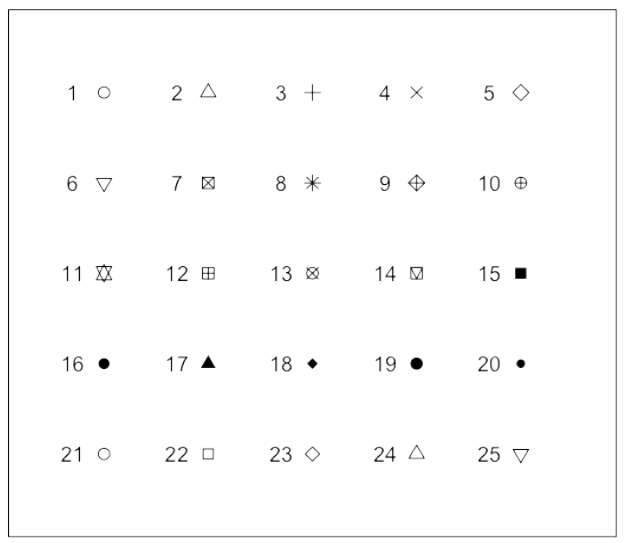

## ☝ Mejorando un plot

Vamos a poner mas presentable nuestro plot original de valores de luciferasa transformados por logaritmo

Primero hagámonos la siguiente pregunta:

        ¿Qué consecuencias tiene agregar colores, formas ó tamaños variables en los puntos de un scatterplot?

### Identificación de información adicional

In [ ]:
head(luciferasas)

In [ ]:
table(luciferasas$Celulas)

In [ ]:
table(luciferasas$Plasmido)
length(unique(luciferasas$Plasmido))

Vamos a agregar uno por uno los elementos del plot

In [ ]:
# con el type = "n" comenzamos por un plot vacío con las dimensiones de nuestros datos
plot(luciferasas$logluci, luciferasas$logreni,
  type = "n",
  xlab = "log2(señal de luciferasa de luciérnaga)",
  ylab = "log2(señal de luciferasa de renilla)",
  main = "Gráfico de comparación entre señales de luciferasa"
)

points(luciferasas$logluci[luciferasas$Celulas == "K562"],
  luciferasas$logreni[luciferasas$Celulas == "K562"],
  pch = 15,   # Tipo de punto
  col = "blue" # Color del punto
)

Agregamos ahora cada uno de los datos en forma de otra serie de puntos

In [ ]:
plot(luciferasas$logluci, luciferasas$logreni,
  type = "n",
  xlab = "log2(señal de luciferasa de luciérnaga)",
  ylab = "log2(señal de luciferasa de renilla)",
  main = "Gráfico de comparación entre señales de luciferasa"
)

points(luciferasas$logluci[luciferasas$Celulas == "K562"],
  luciferasas$logreni[luciferasas$Celulas == "K562"],
  pch = 15,
  col = "blue"
)

points(luciferasas$logluci[luciferasas$Celulas == "MCF7"],
  luciferasas$logreni[luciferasas$Celulas == "MCF7"],
  pch = 17,
  col = "darkgreen"
)

points(luciferasas$logluci[luciferasas$Celulas == "MCF10A"],
  luciferasas$logreni[luciferasas$Celulas == "MCF10A"],
  pch = 19,
  col = "red",
)

Agregamos un cuadro de referencia

In [ ]:
plot(luciferasas$logluci, luciferasas$logreni,
  type = "n",
  xlab = "log2(señal de luciferasa de luciérnaga)",
  ylab = "log2(señal de luciferasa de renilla)",
  main = "Gráfico de comparación entre señales de luciferasa"
)

points(luciferasas$logluci[luciferasas$Celulas == "K562"],
  luciferasas$logreni[luciferasas$Celulas == "K562"],
  pch = 15,
  col = "blue"
)

points(luciferasas$logluci[luciferasas$Celulas == "MCF7"],
  luciferasas$logreni[luciferasas$Celulas == "MCF7"],
  pch = 17,
  col = "darkgreen"
)

points(luciferasas$logluci[luciferasas$Celulas == "MCF10A"],
  luciferasas$logreni[luciferasas$Celulas == "MCF10A"],
  pch = 19,
  col = "red",
)

legend(x = -2 , y = 8, # Aqui puedo poner mis coordenadas
  legend = c("K562","MCF7","MCF10A"),
  pch = c(15,17,19),
  col = c("blue", "darkgreen","red")
)

Opciones del cuadro de referencia

In [ ]:
plot(luciferasas$logluci, luciferasas$logreni,
  type = "n",
  xlab = "log2(señal de luciferasa de luciérnaga)",
  ylab = "log2(señal de luciferasa de renilla)",
  main = "Gráfico de comparación entre señales de luciferasa",
)

points(luciferasas$logluci[luciferasas$Celulas == "K562"],
  luciferasas$logreni[luciferasas$Celulas == "K562"],
  pch = 15,
  col = "blue"
)

points(luciferasas$logluci[luciferasas$Celulas == "MCF7"],
  luciferasas$logreni[luciferasas$Celulas == "MCF7"],
  pch = 17,
  col = "darkgreen"
)

points(luciferasas$logluci[luciferasas$Celulas == "MCF10A"],
  luciferasas$logreni[luciferasas$Celulas == "MCF10A"],
  pch = 19,
  col = "red",
)

legend(x = "topleft", # en vez de coordenadas puedo usar palabras clave:
# top, topleft, topright, center, bottom, bottomleft . . .
  legend = c("K562","MCF7","MCF10A"),
  pch = c(15,17,19),
  col = c("blue", "darkgreen","red"),
  text.font = 3, # Modifica la presentación del texto
  bty = "n", # Evita colocar un marco
  cex = 1.4 # Cambia el tamaño de la letra
)

Armonizando los tamaños de las letras en los títulos y ejes y agregando una linea que indica el cero en el eje de la X y otra línea en el eje de la Y

In [ ]:
plot(luciferasas$logluci, luciferasas$logreni,
  type = "n",
  xlab = "log2(señal de luciferasa de luciérnaga)",
  ylab = "log2(señal de luciferasa de renilla)",
  main = "Gráfico de comparación entre señales de luciferasa",
  cex.main = 1.5, # valor de cex para el título
  cex.lab = 1.5 # valor de cex para el subtítulo
)

points(luciferasas$logluci[luciferasas$Celulas == "K562"],
  luciferasas$logreni[luciferasas$Celulas == "K562"],
  pch = 15,
  col = "blue"
)

points(luciferasas$logluci[luciferasas$Celulas == "MCF7"],
  luciferasas$logreni[luciferasas$Celulas == "MCF7"],
  pch = 17,
  col = "darkgreen"
)

points(luciferasas$logluci[luciferasas$Celulas == "MCF10A"],
  luciferasas$logreni[luciferasas$Celulas == "MCF10A"],
  pch = 19,
  col = "red",
)

legend(x = "topleft",
  legend = c("K562","MCF7","MCF10A"),
  pch = c(15,17,19),
  col = c("blue", "darkgreen","red"),
  text.font = 3,
  bty = "n",
  cex = 1.4
)
abline(
  v= 0, h= 7, # la "v" indica una línea vertical, una "h" sería para horizontal
  col = "purple",
  lwd = 5,
  lty = "dotted"
)

## ⚡ **Trabajo en clase**


Haz un scatterplot con de los mismos datos pero esta vez vas a representar lo siguiente:

  * Con formas distintas `pch` para cáda tipo de célula (columna `Celulas`)
  * Con colores distintos `col` para uno de los **18 tipos de plásmido** (columna `Plasmido`)
  * Elige un tamaño distinto de punto `cex` en por cada valor unico en la columna `Experimento`
  * Recuerda que tu gráfico final debe contener:
    * Título
    * Etiquetas de los ejes
    * Tabla de referencias de colores y formas
    * Dos lineas dividiendo el plot en cuatro cuadrantes

Tip: usa como referencia la tabla de colores de aquí abajo

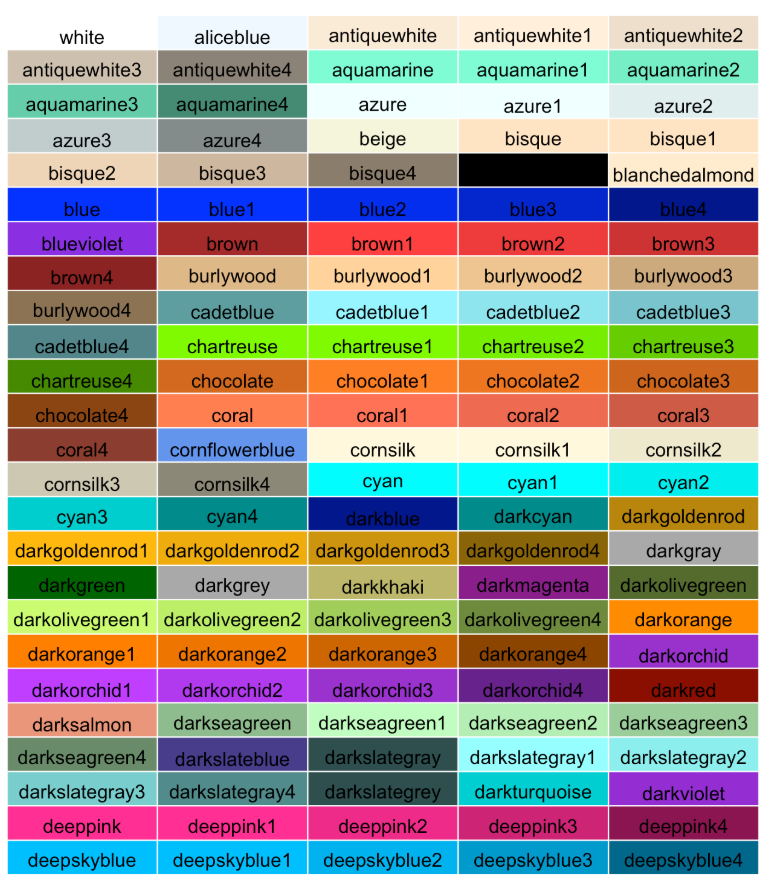

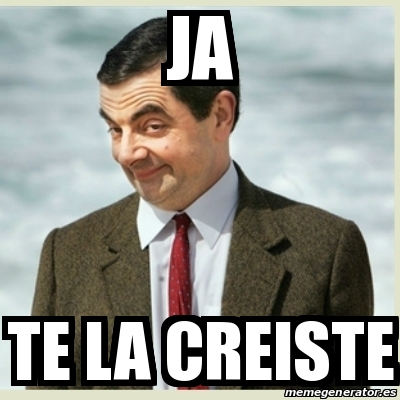

## ☝ Exportando los plots para su edición

Las funciones básicas de R nos permiten personalizar los gráficos e incluso con la función `par()` podemos definir la disposición (layout) que puede tener una página de un documento para por ejemplo agregar simultáneamente varios plots incluso siendo de tamaño distinto.

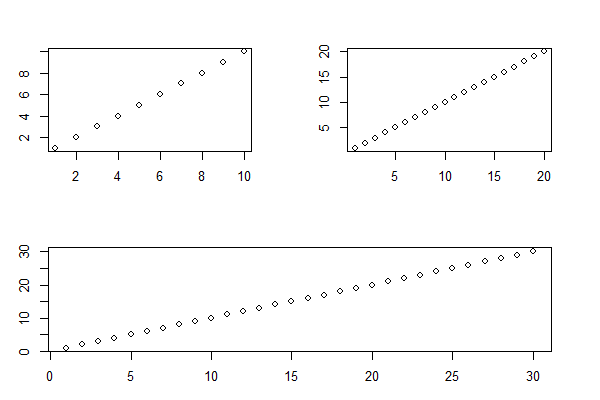

Sin embargo esto no suele ser lo más práctico y como te pudiste dar cuenta agregar todas las opciones visuales puede ser muy complicado y largo, muchas veces es mejor dar los toques finales fuera de los lenguajes de programación.

Para ello es **imprescindible** guardar nuestros archivos en un formato editable, y el más fácil es un PDF.

Este puede ser modificado muy fácilmente en programas de edición vectorial cómo

 * __Inkscape__ (Gratuíto, de código libre, para todas las plataformas)
 * Affinity Designer ("Barato", MacOS, Windows, iOS)
 * Adobe Illustrator (Suscripción ó peor)

 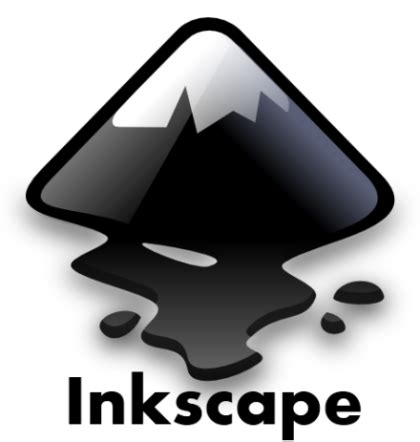

### 📸 Guardemos el resultado

Con la función `pdf()` podemos guardar nuestro plot para la posteridad

**Es importante que guardemos nuestro plot como un objeto de R antes de seguir adelante**

```
pdf("titulo de mi plot.pdf",width = 8, height = 4) # dimensiones en pulgadas

#El código de nuestro plot

dev.off() # con esto le decimos a R que ya terminamos de definir nuestro pdf
```

In [ ]:
pdf("plot_preliminar.pdf", width = 5, height = 5)
  plot(luciferasas$logluci, luciferasas$logreni,
    type = "n",
  )

  points(luciferasas$logluci[luciferasas$Celulas == "K562"],
    luciferasas$logreni[luciferasas$Celulas == "K562"],
    pch = 15,
    col = "blue"
  )

  points(luciferasas$logluci[luciferasas$Celulas == "MCF7"],
    luciferasas$logreni[luciferasas$Celulas == "MCF7"],
    pch = 17,
    col = "darkgreen"
  )

  points(luciferasas$logluci[luciferasas$Celulas == "MCF10A"],
    luciferasas$logreni[luciferasas$Celulas == "MCF10A"],
    pch = 19,
    col = "red",
  )

dev.off()

## ⏰  **Ejercicio**

Agrega **algunas** mejoras visuales al siguiente código de gráfico y exportalo cómo pdf

### 📈 MA plot de datos de expresión diferencial.

Un plot de este tipo nos permite correlacionar los conteos normalizados de un experimento con el valor de cambio de una comparación.

por lo tanto en nuestro data set `expdiff` está representado por las columnas `logFC` (log2FoldChange) y `logCPM` (media transformada de los conteos normalizados)

In [ ]:
plot(expdiff$logCPM,expdiff$logFC)